## 1. Import

In [6]:
import pandas as pd

file_url = 'D:\\GitHub\\Clustering - BFSI Client DB\\Participants_Data_analytics_olympiad_2023\\train.csv'

client_df = pd.read_csv(file_url)

## 2. Data Understanding - EDA

In [9]:
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(client_df.head(10))

,customer_id,firstname,lastname,record_number,days_since_opened,days_since_confirmed,primary_term,final_term,days_till_primary_close,days_till_final_close,loans_credit_limit,loans_next_payment_summary,loans_outstanding_balance,loans_max_overdue_amount,loans_credit_cost_rate,loans_within_5_days,loans_within_5_to_30_days,loans_within_30_to_60_days,loans_within_60_to_90_days,loans_over_90_days,is_zero_loans_within_5_days,is_zero_loans_within_5_to_30_days,is_zero_loans_within_30_to_60_days,is_zero_loans_within_60_to_90_days,is_zero_loans_over_90_days,utilization,over_limit_count,max_over_limit_count,is_zero_utilization,is_zero_over_limit_count,is_zero_max_over_limit_count,encoded_payment_0,encoded_payment_1,encoded_payment_2,encoded_payment_3,encoded_payment_4,encoded_payment_5,encoded_payment_6,encoded_payment_7,encoded_payment_8,encoded_payment_9,encoded_payment_10,encoded_payment_11,encoded_payment_12,encoded_payment_13,encoded_payment_14,encoded_payment_15,encoded_payment_16,encoded_payment_17,encoded_payment_18,encoded_payment_19,encoded_payment_20,encoded_payment_21,encoded_payment_22,encoded_payment_23,encoded_payment_24,encoded_loans_account_holder_type,encoded_loans_credit_status,encoded_loans_credit_type,encoded_loans_account_currency,primary_close_flag,final_close_flag
0,4814dfa2-45a8-46b9-8102-98ecbbec2d2a,Navya,Vasa,7,10,8,12,10,13,5,11,2,3,2,4,6,13,5,4,8,Yes,No,Yes,Yes,Yes,16,2,17,Yes,Yes,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,3.0,4.0,1,3,4,1,0,0
1,bb0abe41-cc89-4a1d-bb1c-48bd212ae00d,Azad,Warrior,5,15,6,7,6,9,1,5,6,3,2,7,6,16,5,4,8,Yes,Yes,Yes,Yes,Yes,16,2,17,Yes,Yes,Yes,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,1,3,4,1,0,0
2,edfd1a62-05da-4cfd-b8ae-521f05f0fd5f,Piya,Jha,1,15,17,8,5,9,1,6,2,3,2,4,6,16,5,4,8,Yes,Yes,Yes,Yes,Yes,16,2,17,Yes,Yes,Yes,0.0,NaN,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,1,3,4,1,0,0
3,3eaa4c2a-2316-48f4-b1b0-4aafe2286630,Rhea,Varma,11,7,2,11,13,14,8,14,3,5,2,0,6,16,5,4,8,Yes,Yes,Yes,Yes,Yes,18,2,17,No,Yes,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,1,2,4,1,0,0
4,c9a73239-baae-40eb-8855-dab07767ea86,Sahil,Dave,12,14,9,8,11,6,13,5,6,3,2,4,6,16,5,4,8,Yes,Yes,Yes,Yes,Yes,16,2,17,Yes,Yes,Yes,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,1,3,4,1,0,0
5,f91f7fc4-d5ac-451b-b2ba-d4b0295c8c26,Lakshay,Gour,10,11,9,14,7,14,8,9,4,5,2,11,6,16,5,4,8,Yes,Yes,Yes,Yes,Yes,1,2,17,No,Yes,Yes,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,4.0,3.0,3.0,3.0,4.0,1,2,4,1,0,0
6,b8f6317c-b8bd-43c2-896d-5de74a3e46ac,Yasmin,Dhaliwal,1,13,13,13,0,13,5,1,2,3,2,5,6,16,5,4,8,Yes,No,Yes,Yes,Yes,16,2,17,Yes,Yes,Yes,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,1,3,4,1,0,0
7,dd2c3084-05ad-411b-93fb-b7391aa9f398,Ehsaan,Balakrishnan,10,6,5,9,12,3,5,5,2,3,2,10,6,16,5,4,8,Yes,Yes,Yes,Yes,Yes,16,2,17,Yes,Yes,Yes,0.0,0.0,NaN,0.0,0.0,3.0,3.0,NaN,3.0,NaN,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,1,3,4,1,0,0
8,2216c081-23d9-432d-9c0a-0ba56c4f8bc3,Diya,Dutt,33,9,2,17,14,8,8,13,2,3,2,2,6,16,5,4,8,Yes,Yes,Yes,Yes,Yes,7,2,17,No,Yes,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,1,2,4,1,0,0
9,bb4d53f6-f5ce-496d-acb9-5448db42ce67,Ranbir,Singh,7,15,7,12,15,6,13,11,2,3,2,4,6,16,5,4,8,Yes,Yes,Yes,Yes,Yes,16,2,17,Yes,Yes,Yes,NaN,0.0,0.0,3.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,3.0,3.0,3.0,4.0,1,3,4,1,0,0


In [21]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106674 entries, 0 to 1106673
Data columns (total 59 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   record_number                       1106674 non-null  int64  
 1   days_since_opened                   1106674 non-null  int64  
 2   days_since_confirmed                1106674 non-null  int64  
 3   primary_term                        1106674 non-null  int64  
 4   final_term                          1106674 non-null  int64  
 5   days_till_primary_close             1106674 non-null  int64  
 6   days_till_final_close               1106674 non-null  int64  
 7   loans_credit_limit                  1106674 non-null  int64  
 8   loans_next_payment_summary          1106674 non-null  int64  
 9   loans_outstanding_balance           1106674 non-null  int64  
 10  loans_max_overdue_amount            1106674 non-null  int64  
 11  loans_credi

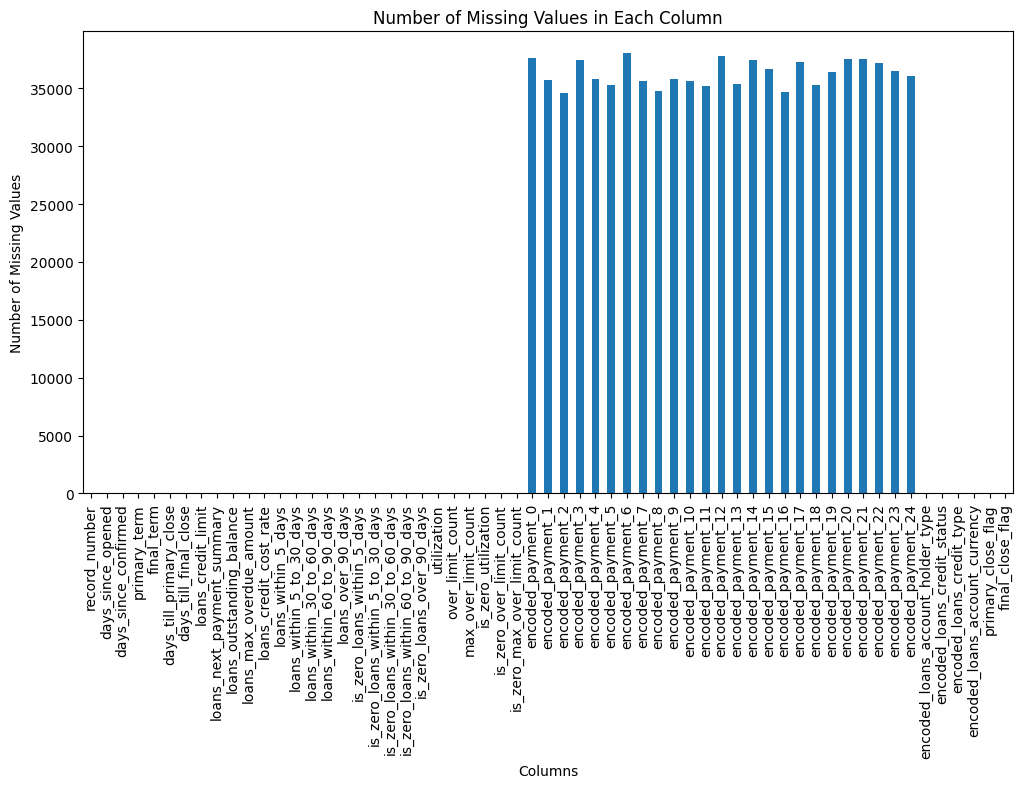

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of missing values in each column
missing_values_count = client_df.isnull().sum()

# Create a bar plot to visualize missing values
plt.figure(figsize=(12, 6))
missing_values_count.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values in Each Column')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


In [11]:
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(client_df.nunique())

customer_id                           98376
firstname                               208
lastname                                450
record_number                            46
days_since_opened                        20
days_since_confirmed                     18
primary_term                             18
final_term                               17
days_till_primary_close                  17
days_till_final_close                    16
loans_credit_limit                       20
loans_next_payment_summary                7
loans_outstanding_balance                 5
loans_max_overdue_amount                  3
loans_credit_cost_rate                   14
loans_within_5_days                       9
loans_within_5_to_30_days                16
loans_within_30_to_60_days                6
loans_within_60_to_90_days                2
loans_over_90_days                        6
is_zero_loans_within_5_days               2
is_zero_loans_within_5_to_30_days         2
is_zero_loans_within_30_to_60_da

## 3. Data Preparation

### 3.1 Drop Columns which don't add value

In [12]:
# Drop the specified columns
columns_to_drop = ['customer_id', 'firstname', 'lastname']
client_df = client_df.drop(columns=columns_to_drop)

### 3.2 Impute

In [19]:
import pandas as pd

# List of column names with missing values
columns_with_missing_values = [
    'encoded_payment_0', 'encoded_payment_1', 'encoded_payment_2', 'encoded_payment_3',
    'encoded_payment_4', 'encoded_payment_5', 'encoded_payment_6', 'encoded_payment_7',
    'encoded_payment_8', 'encoded_payment_9', 'encoded_payment_10', 'encoded_payment_11',
    'encoded_payment_12', 'encoded_payment_13', 'encoded_payment_14', 'encoded_payment_15',
    'encoded_payment_16', 'encoded_payment_17', 'encoded_payment_18', 'encoded_payment_19',
    'encoded_payment_20', 'encoded_payment_21', 'encoded_payment_22', 'encoded_payment_23',
    'encoded_payment_24'
]

# Impute missing values with the mode (most frequent value) of each column
for column in columns_with_missing_values:
    mode = client_df[column].mode()[0]  # Calculate the mode
    client_df[column].fillna(mode, inplace=True)  # Fill missing values with the mode

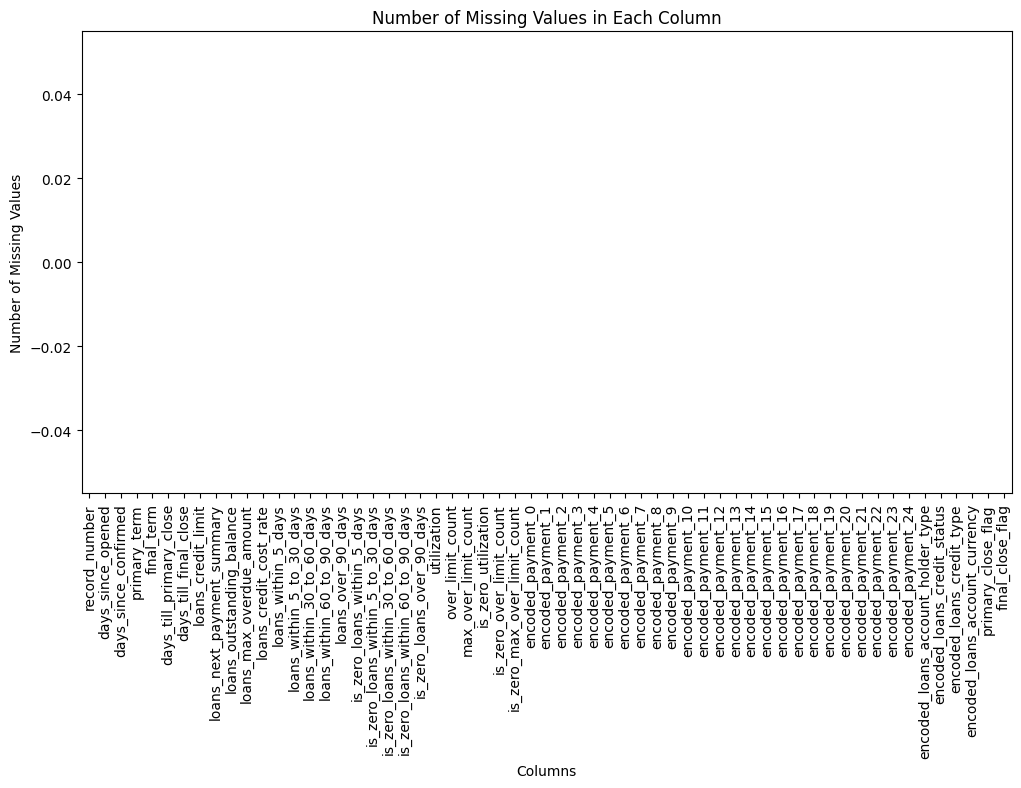

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of missing values in each column
missing_values_count = client_df.isnull().sum()

# Create a bar plot to visualize missing values
plt.figure(figsize=(12, 6))
missing_values_count.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values in Each Column')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


## 4. K-modes Clustering

### 4.1 Elbow Method - To find optimum value of K

In [22]:
#%pip install kmodes

In [24]:
import pandas as pd

sample_size = 1000
client_df_sample = client_df.sample(n=sample_size, random_state=42) 

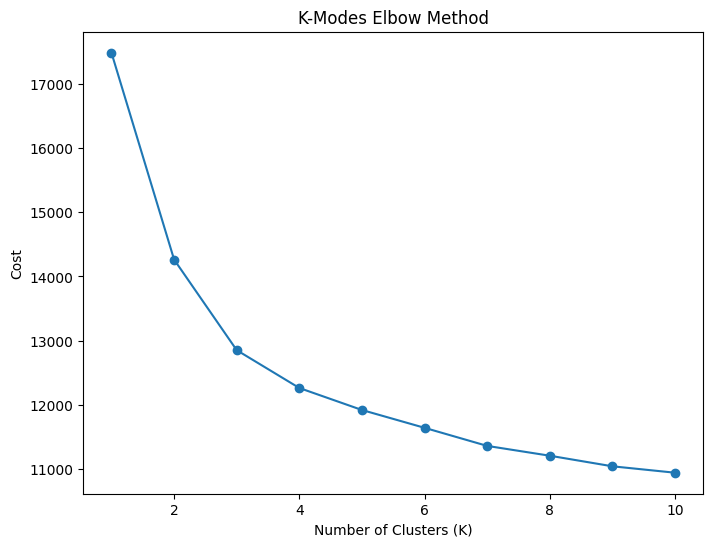

In [25]:
import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

data = client_df_sample

cost = []

# Specify the range of K values to test
start_k = 1
end_k = 10

# Iterate over different values of K
for k in range(start_k, end_k + 1):
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)  # Adjust initialization and hyperparameters
    km.fit(data)
    cost.append(km.cost_)

# Plot the cost values for different K values
plt.figure(figsize=(8, 6))
plt.plot(range(start_k, end_k + 1), cost, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Cost')
plt.title('K-Modes Elbow Method')
plt.show()


In [27]:
# Define the number of clusters (K)
k = 4  # Chosen value of K

# Initialize and fit the K-Modes model
km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)  # You can adjust initialization and other hyperparameters
clusters = km.fit_predict(client_df_sample)

# Add the cluster labels back to your 'client_df_sample' DataFrame
client_df_sample['cluster'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 373, cost: 12546.0
Run 1, iteration: 2/100, moves: 152, cost: 12408.0
Run 1, iteration: 3/100, moves: 32, cost: 12398.0
Run 1, iteration: 4/100, moves: 3, cost: 12398.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 51, cost: 12724.0
Run 2, iteration: 2/100, moves: 38, cost: 12707.0
Run 2, iteration: 3/100, moves: 9, cost: 12702.0
Run 2, iteration: 4/100, moves: 8, cost: 12692.0
Run 2, iteration: 5/100, moves: 7, cost: 12692.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 294, cost: 12420.0
Run 3, iteration: 2/100, moves: 58, cost: 12398.0
Run 3, iteration: 3/100, moves: 4, cost: 12398.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 443, cost: 12693.0
Run 4, iteration: 2/100, moves:

In [28]:
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(client_df_sample.head(10))

,record_number,days_since_opened,days_since_confirmed,primary_term,final_term,days_till_primary_close,days_till_final_close,loans_credit_limit,loans_next_payment_summary,loans_outstanding_balance,loans_max_overdue_amount,loans_credit_cost_rate,loans_within_5_days,loans_within_5_to_30_days,loans_within_30_to_60_days,loans_within_60_to_90_days,loans_over_90_days,is_zero_loans_within_5_days,is_zero_loans_within_5_to_30_days,is_zero_loans_within_30_to_60_days,is_zero_loans_within_60_to_90_days,is_zero_loans_over_90_days,utilization,over_limit_count,max_over_limit_count,is_zero_utilization,is_zero_over_limit_count,is_zero_max_over_limit_count,encoded_payment_0,encoded_payment_1,encoded_payment_2,encoded_payment_3,encoded_payment_4,encoded_payment_5,encoded_payment_6,encoded_payment_7,encoded_payment_8,encoded_payment_9,encoded_payment_10,encoded_payment_11,encoded_payment_12,encoded_payment_13,encoded_payment_14,encoded_payment_15,encoded_payment_16,encoded_payment_17,encoded_payment_18,encoded_payment_19,encoded_payment_20,encoded_payment_21,encoded_payment_22,encoded_payment_23,encoded_payment_24,encoded_loans_account_holder_type,encoded_loans_credit_status,encoded_loans_credit_type,encoded_loans_account_currency,primary_close_flag,final_close_flag,cluster
682142,14,9,2,4,8,1,11,14,2,1,2,2,6,16,5,4,8,Yes,Yes,Yes,Yes,Yes,9,5,4,No,No,No,3.0,3.0,3.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,4,2,1,1,1,1,2
306955,4,3,12,13,6,11,0,3,2,3,2,4,6,16,5,4,8,Yes,Yes,Yes,Yes,Yes,16,2,17,Yes,Yes,Yes,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,1,3,1,1,0,0,0
436486,11,1,6,16,15,1,11,16,2,3,2,1,6,16,5,4,8,Yes,Yes,Yes,Yes,Yes,16,2,17,Yes,Yes,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,1,2,3,1,0,0,1
178546,9,3,1,7,6,11,0,6,2,3,2,9,6,16,5,4,8,Yes,Yes,Yes,Yes,Yes,16,2,17,Yes,Yes,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,1,3,4,1,0,0,0
359338,15,7,1,4,3,2,6,18,2,3,2,6,6,16,5,4,8,Yes,Yes,Yes,Yes,Yes,16,2,17,Yes,Yes,Yes,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,1,3,5,1,0,0,2
533420,13,19,5,3,3,7,15,19,2,3,2,4,6,16,5,4,8,Yes,Yes,Yes,Yes,Yes,16,2,17,Yes,Yes,Yes,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,1,3,5,1,0,0,2
264267,4,13,12,14,7,2,6,9,2,3,2,3,6,16,5,4,8,Yes,No,Yes,Yes,Yes,16,2,17,Yes,Yes,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,3,4,1,0,0,3
873571,11,18,6,4,16,1,14,6,6,3,2,5,6,16,5,4,8,Yes,Yes,Yes,Yes,Yes,16,2,17,Yes,Yes,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1,3,3,1,1,0,3
1002497,10,18,5,11,13,2,6,2,2,3,2,11,6,16,5,4,8,Yes,Yes,Yes,Yes,Yes,16,2,17,Yes,Yes,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,3,0,1,0,0,3
43264,10,5,11,7,6,16,12,6,2,3,2,5,6,16,5,4,8,Yes,Yes,Yes,Yes,Yes,16,2,17,Yes,Yes,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,1,3,4,1,0,0,0


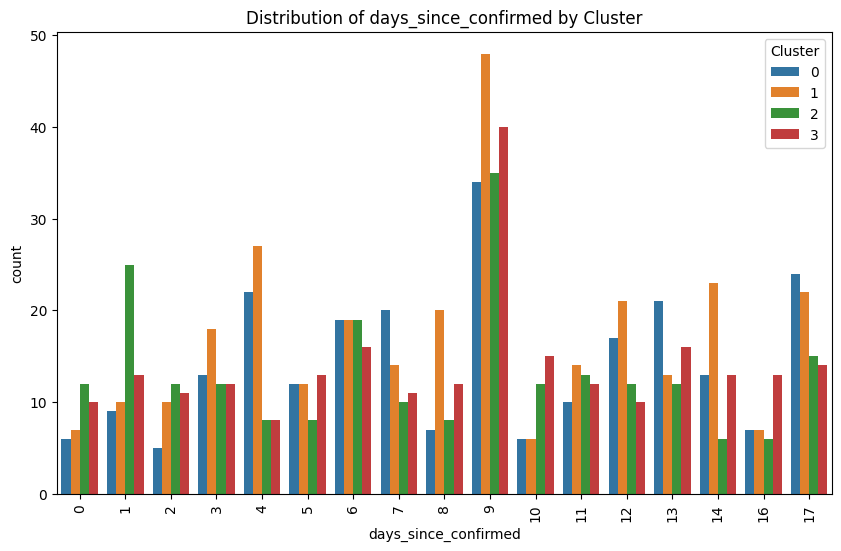

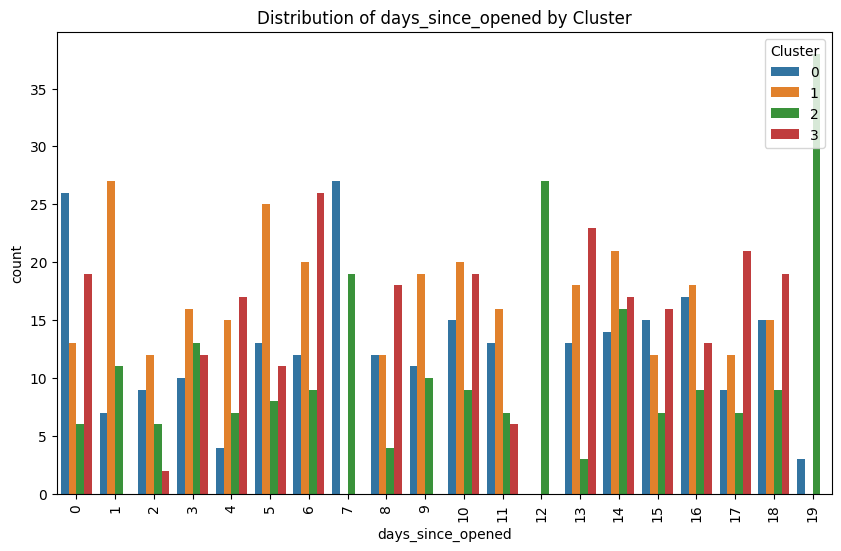

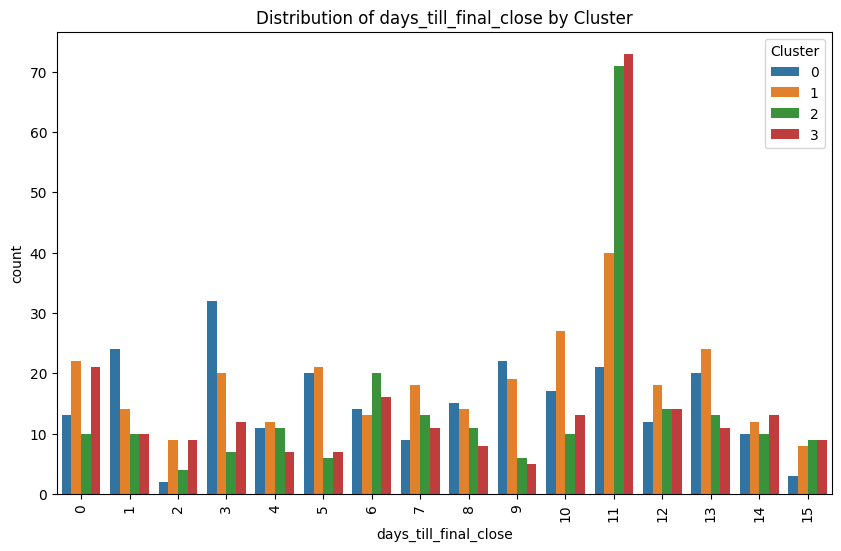

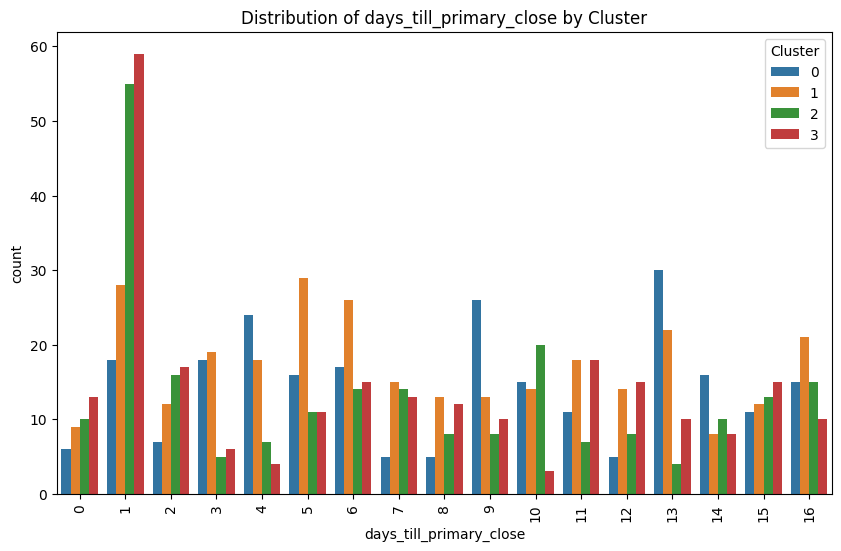

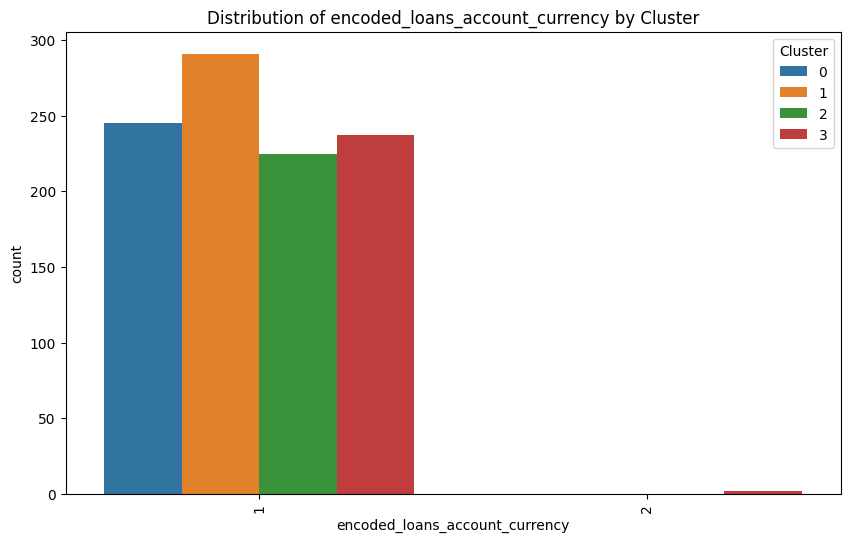

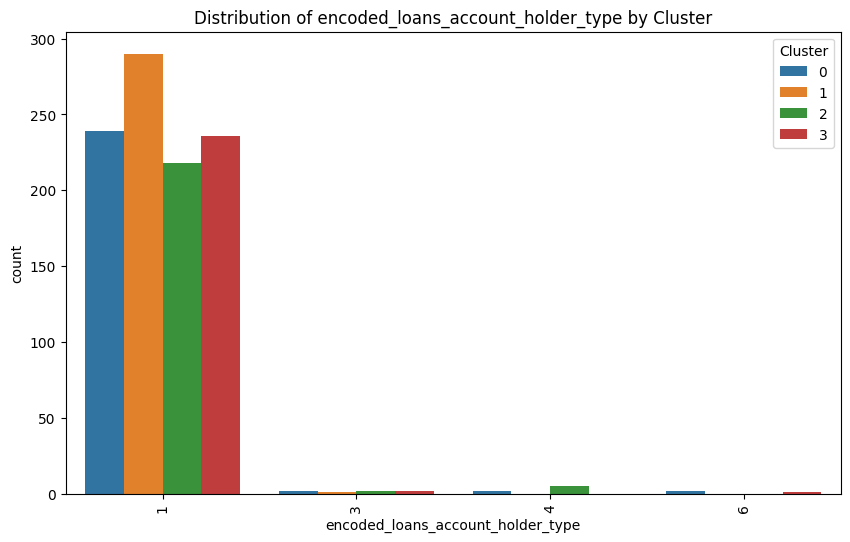

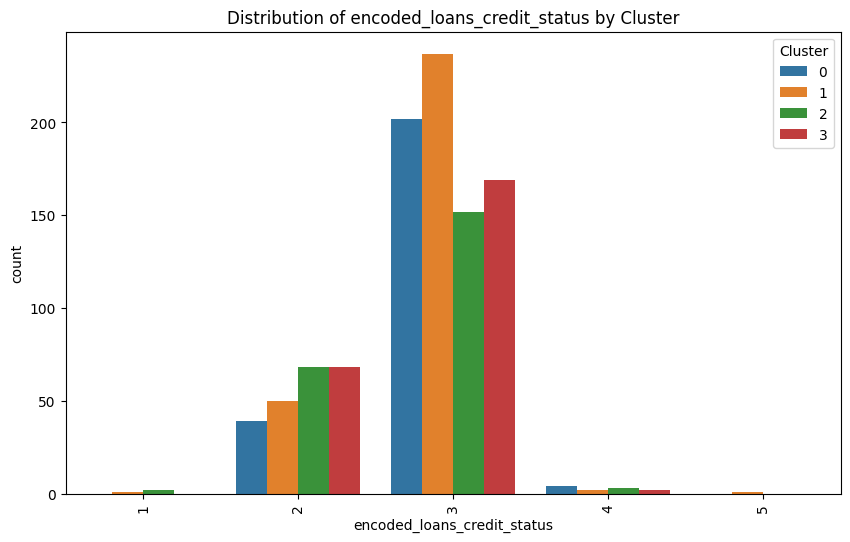

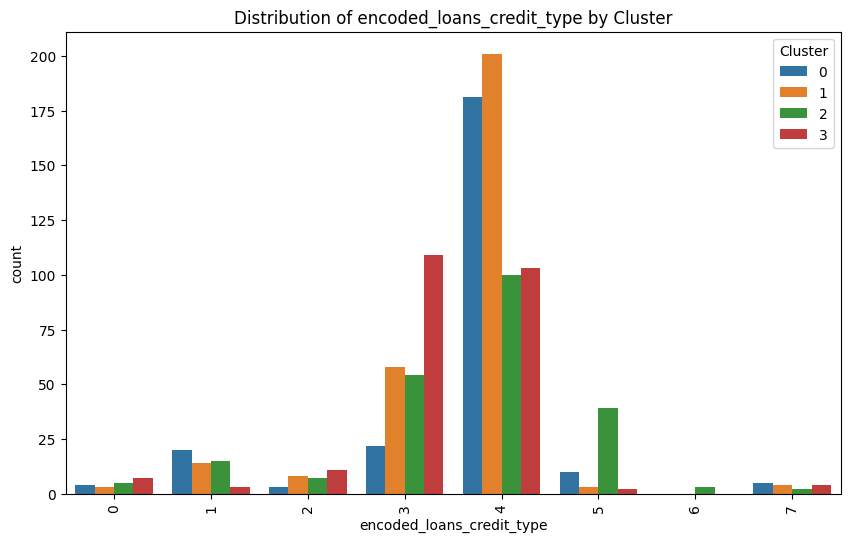

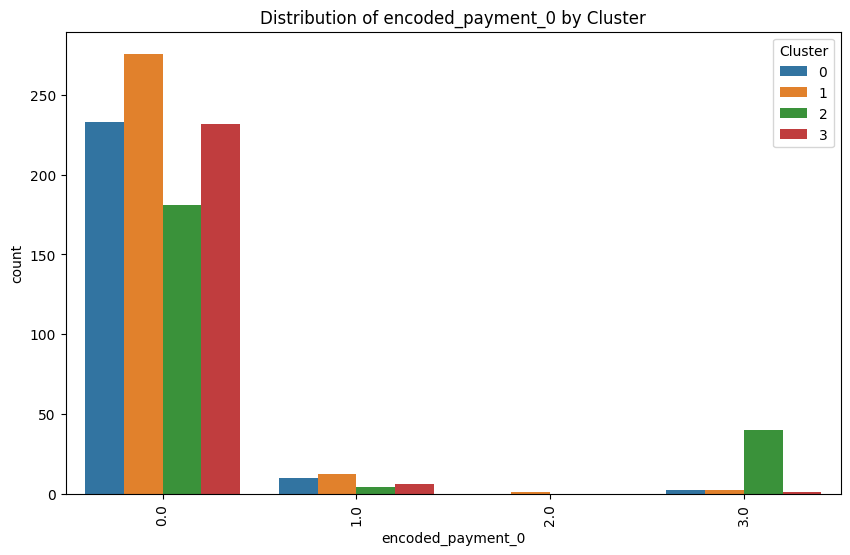

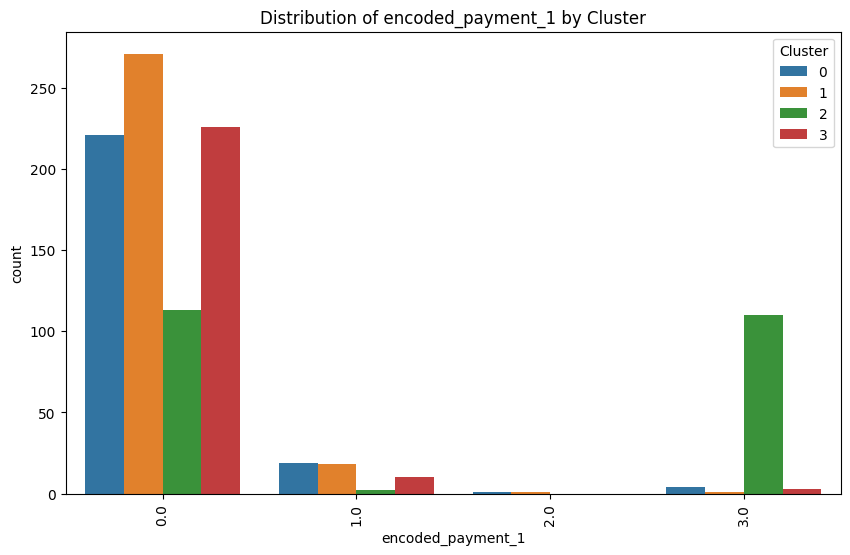

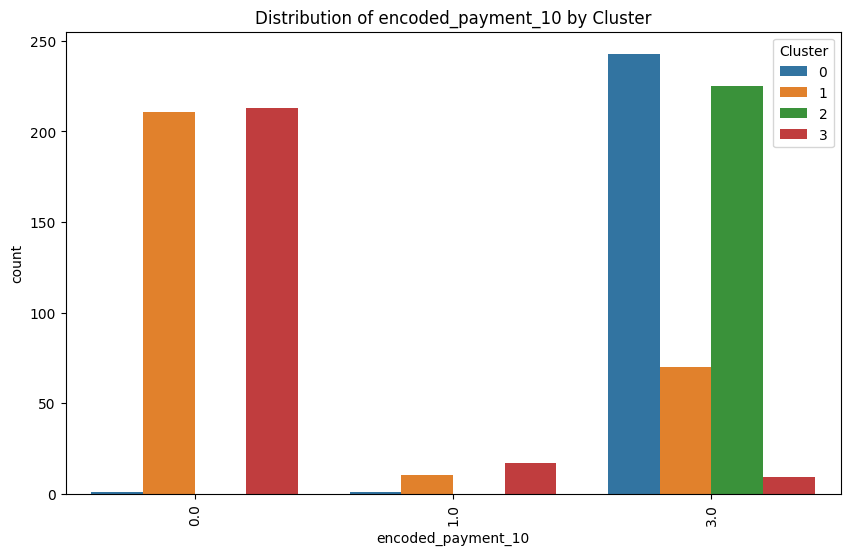

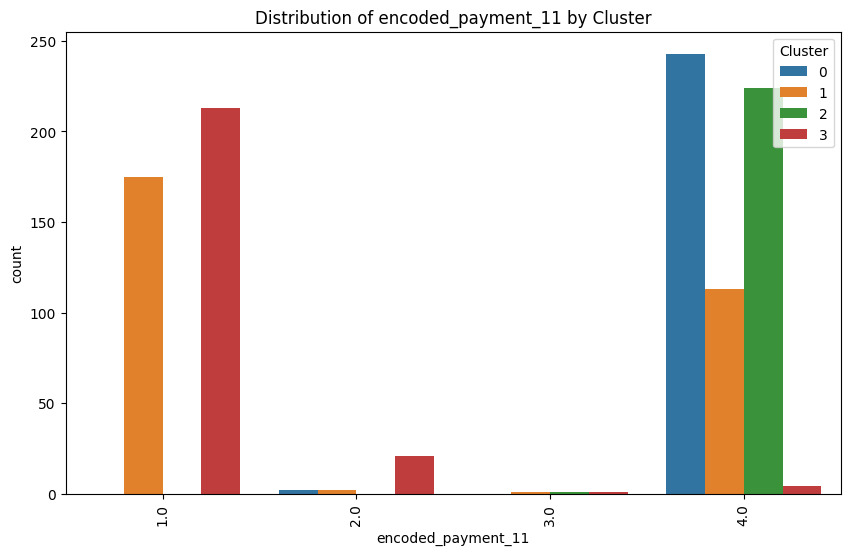

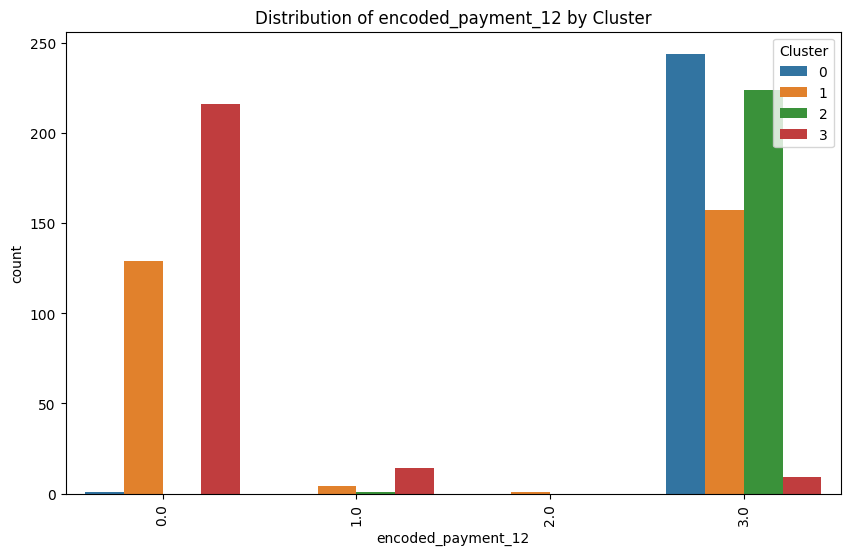

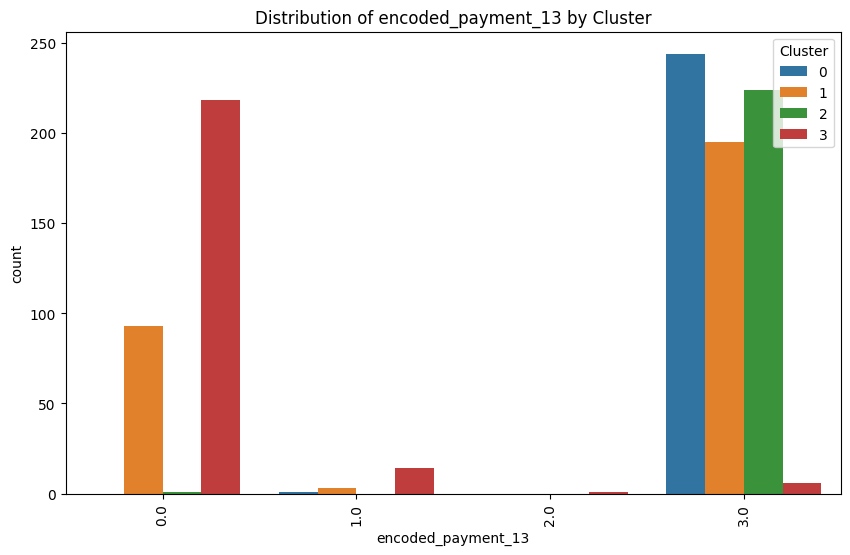

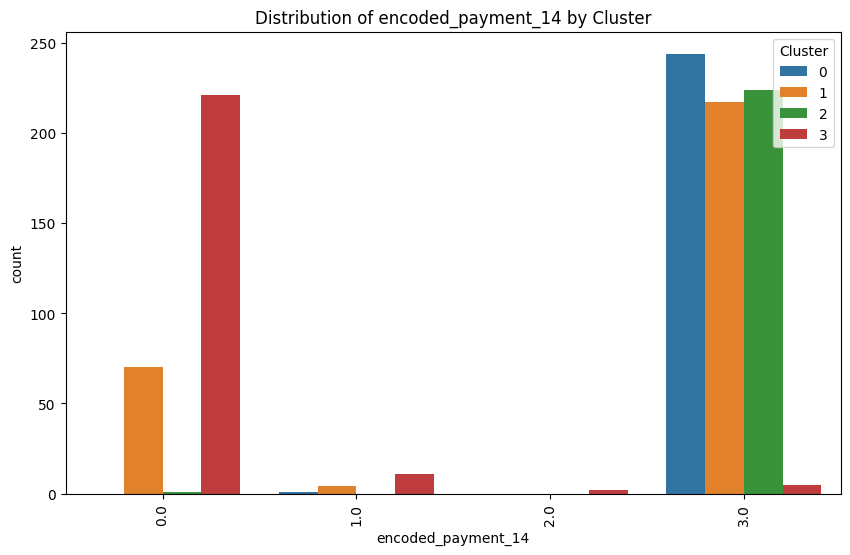

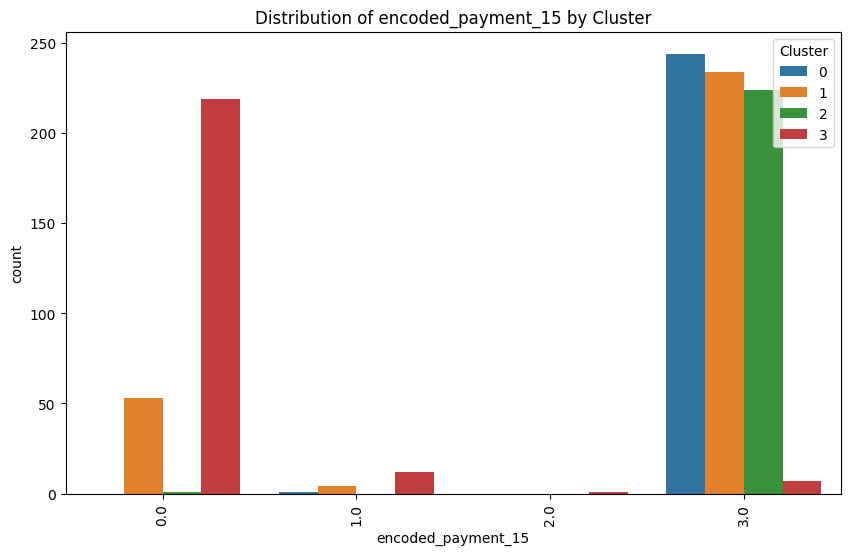

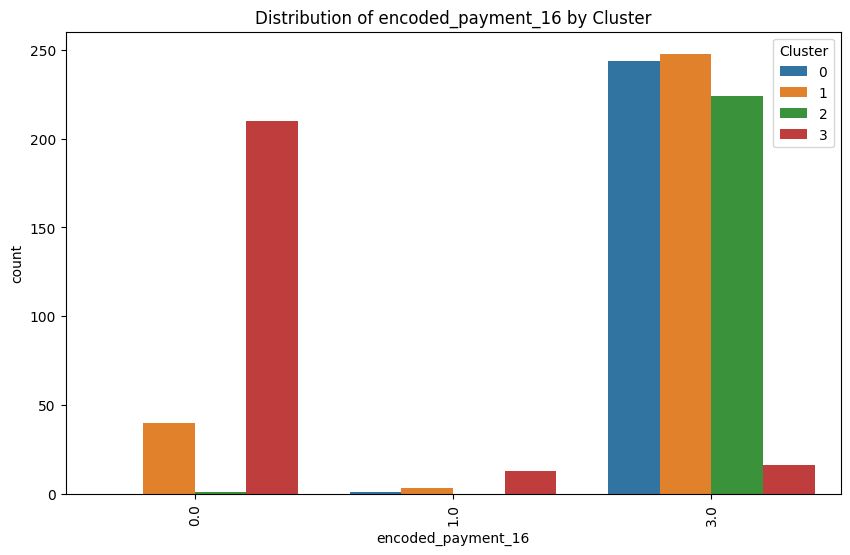

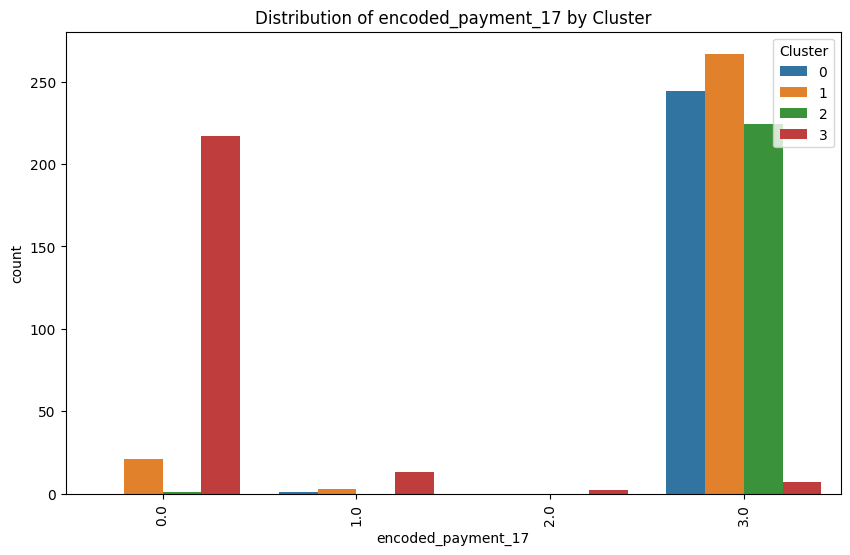

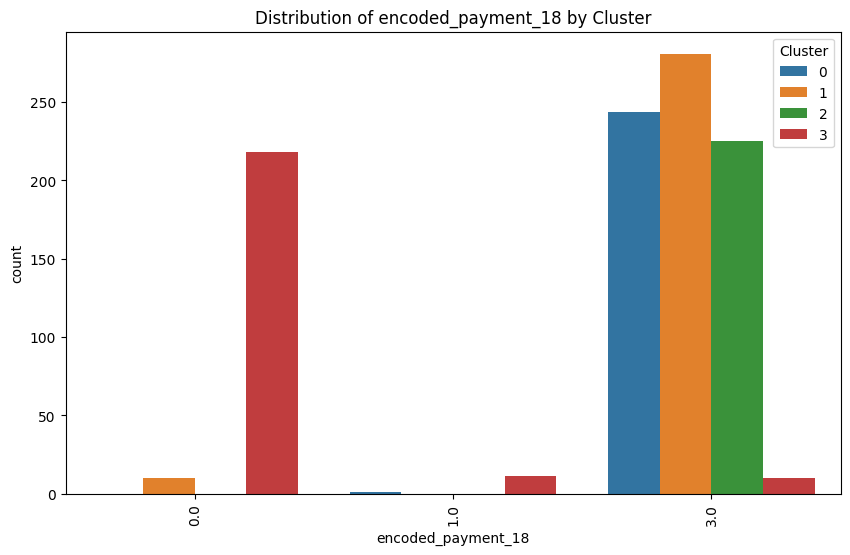

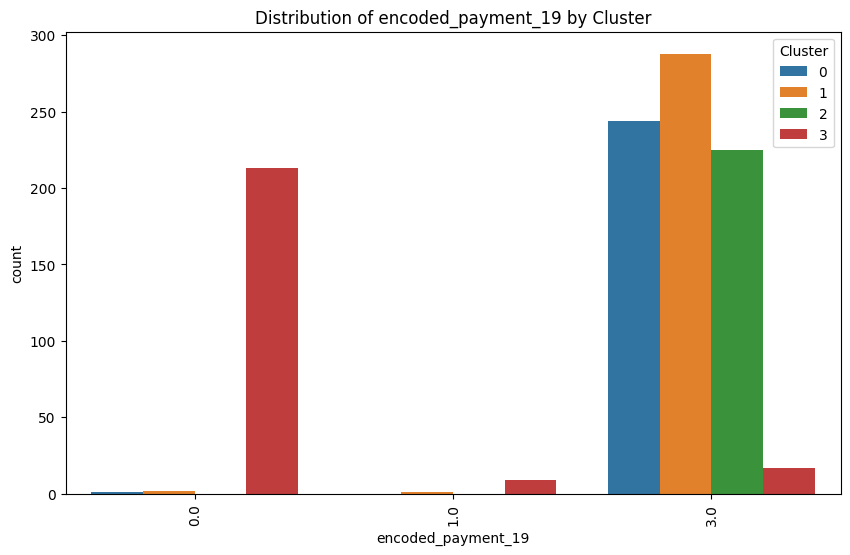

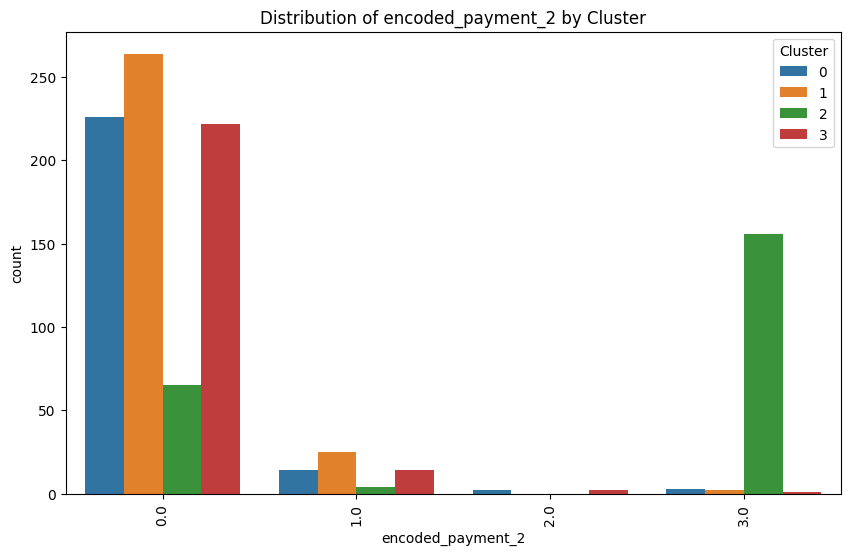

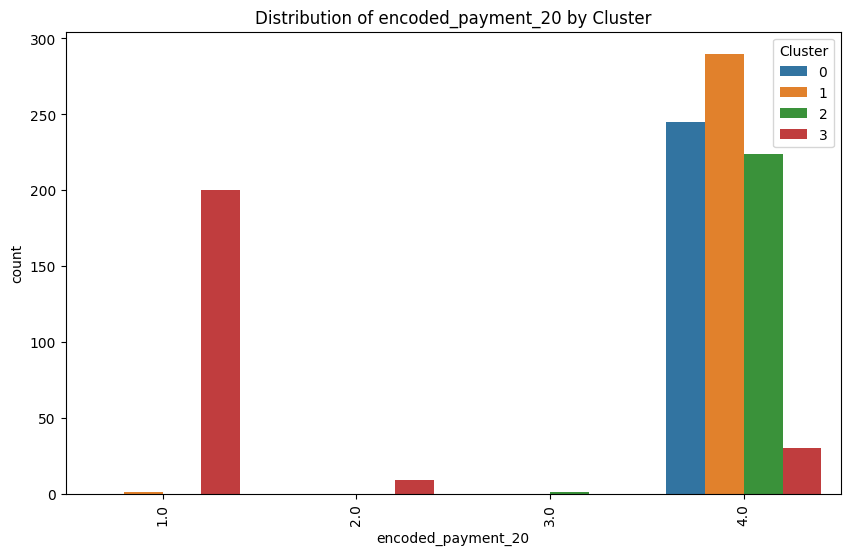

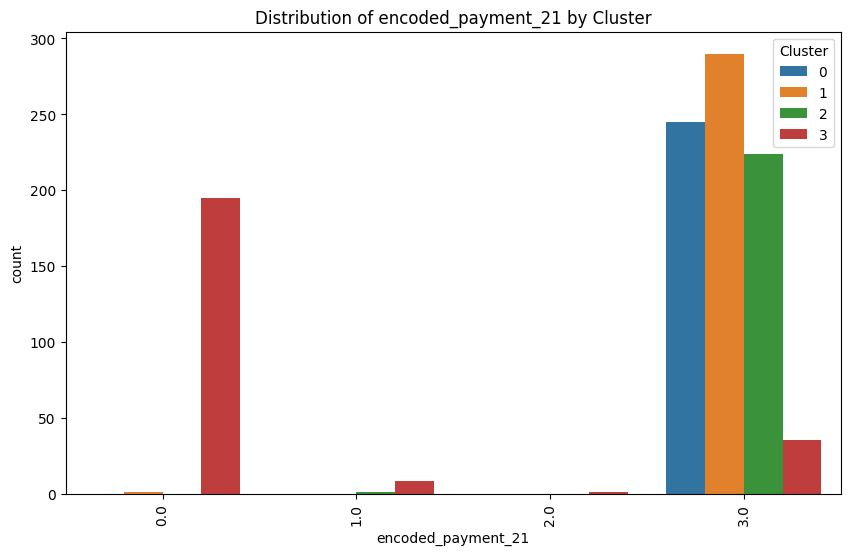

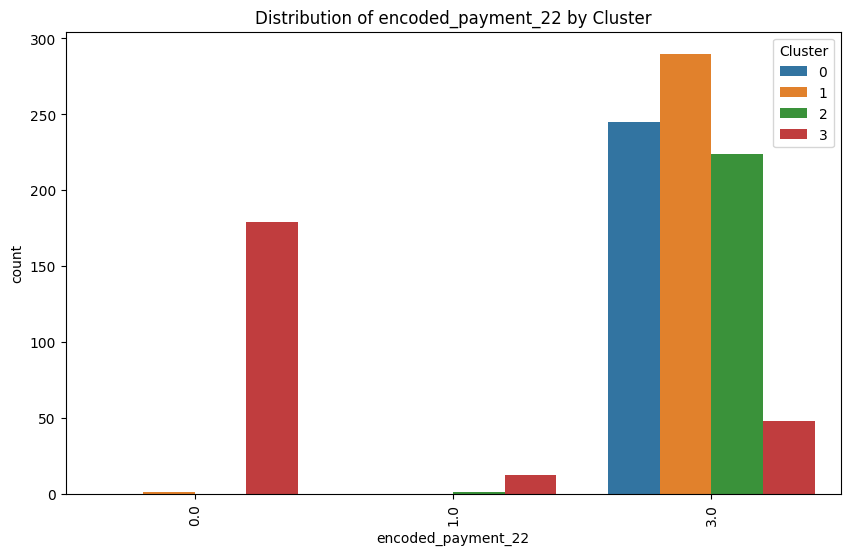

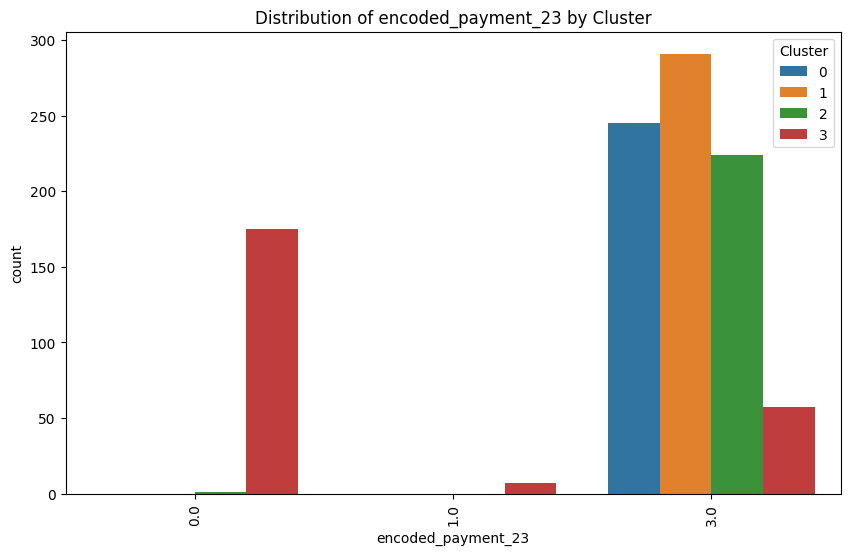

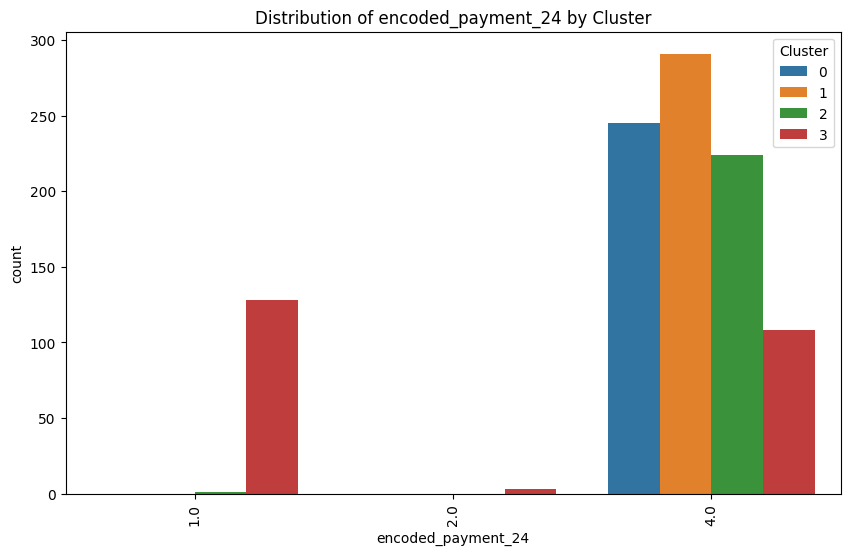

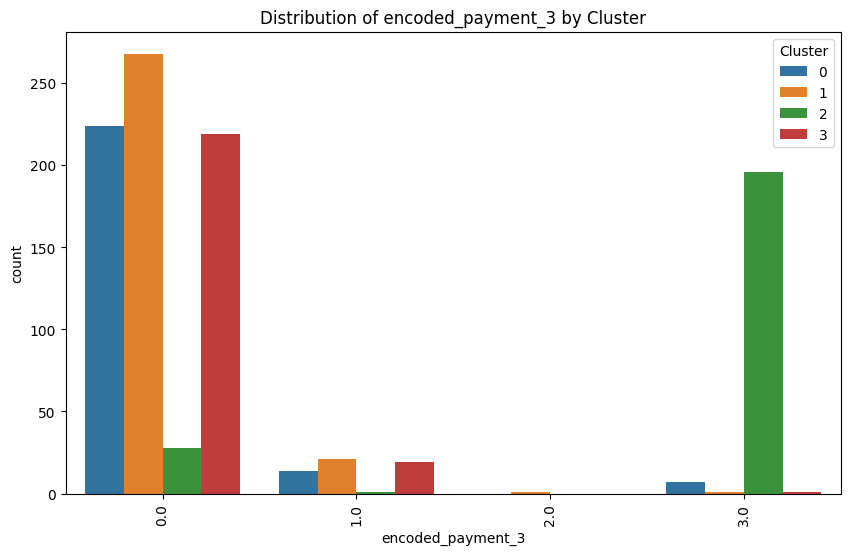

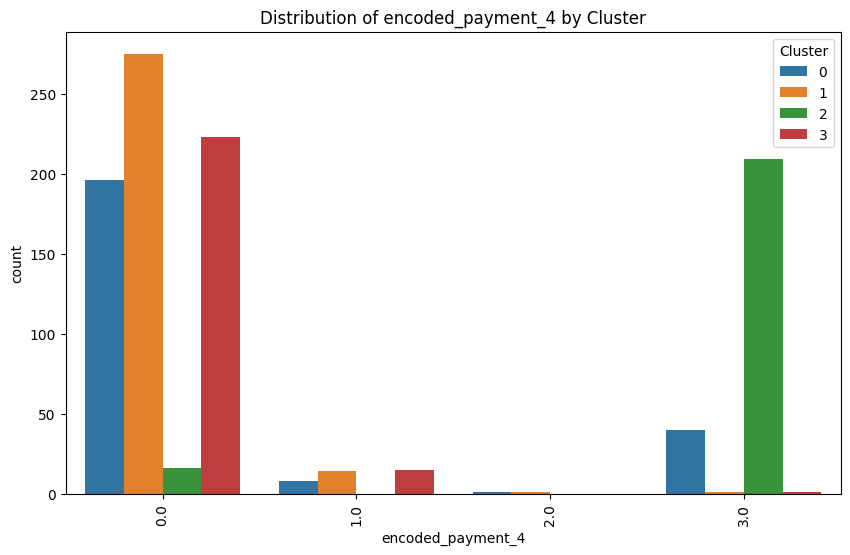

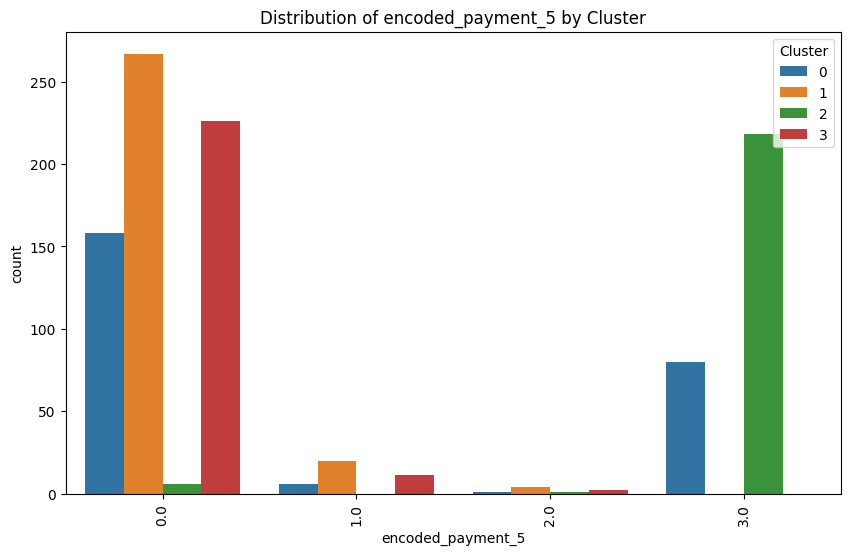

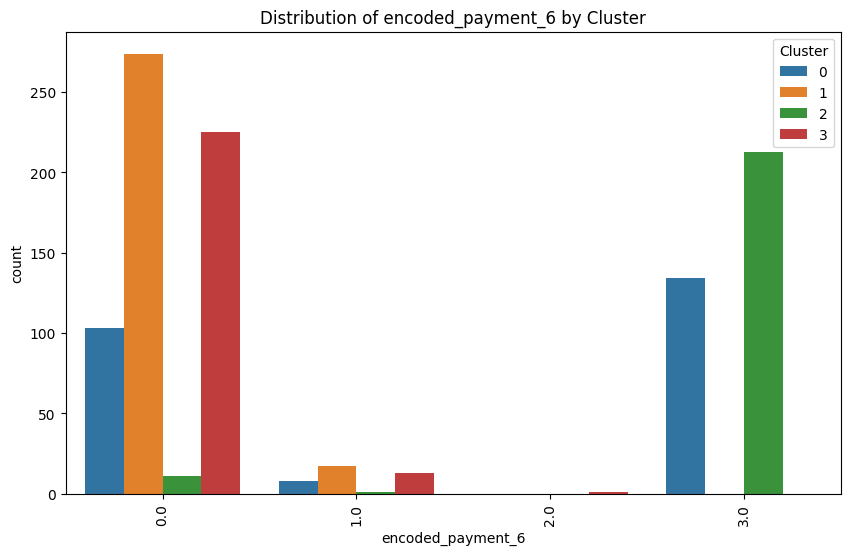

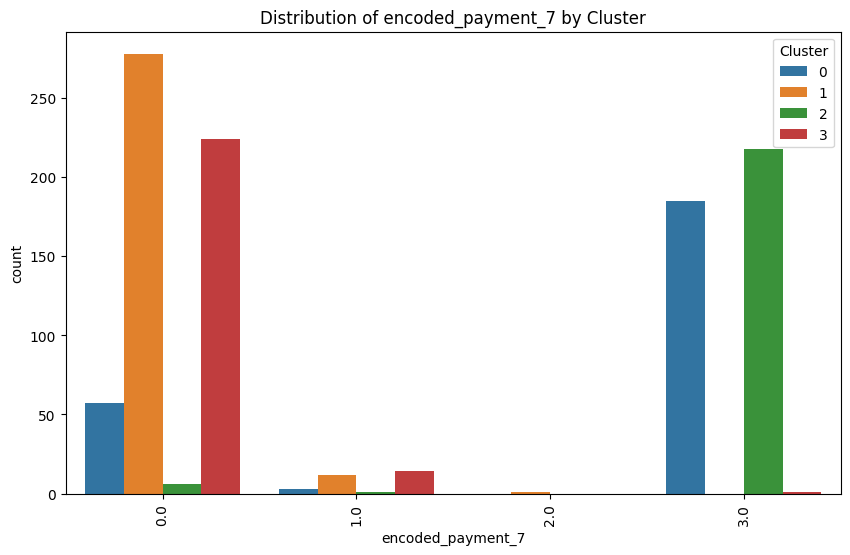

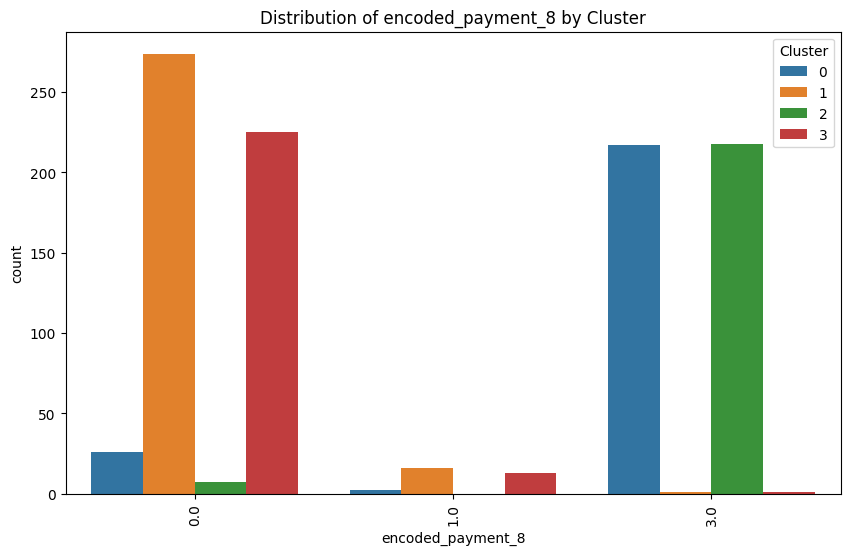

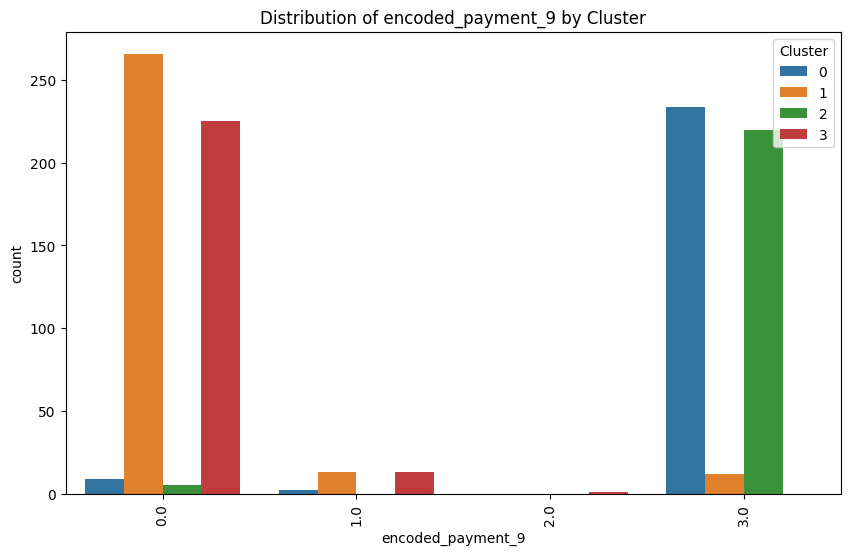

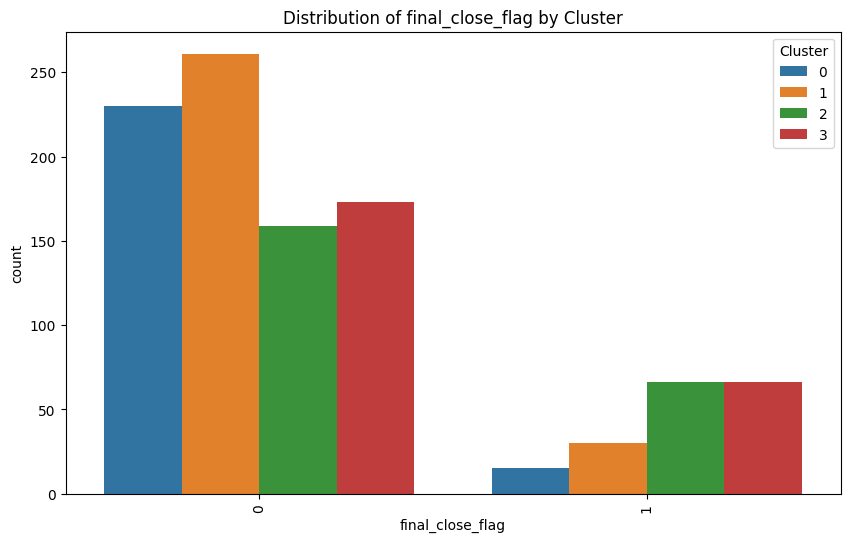

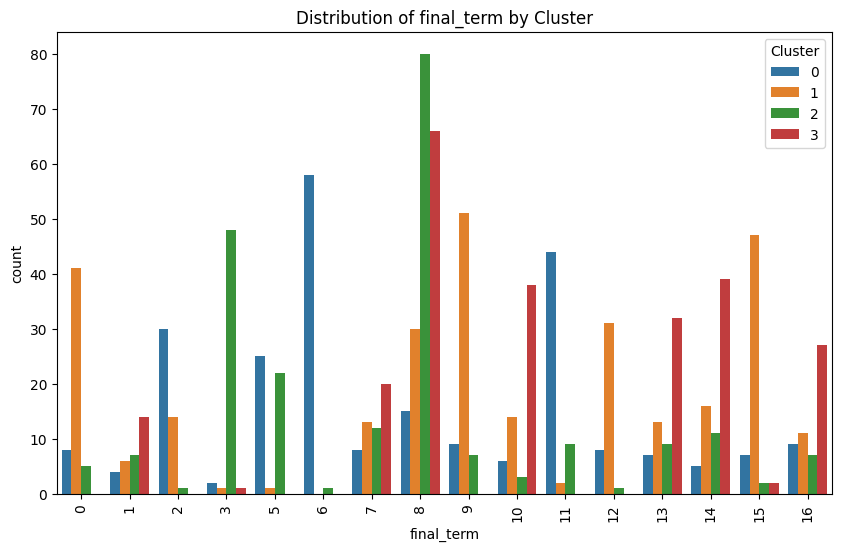

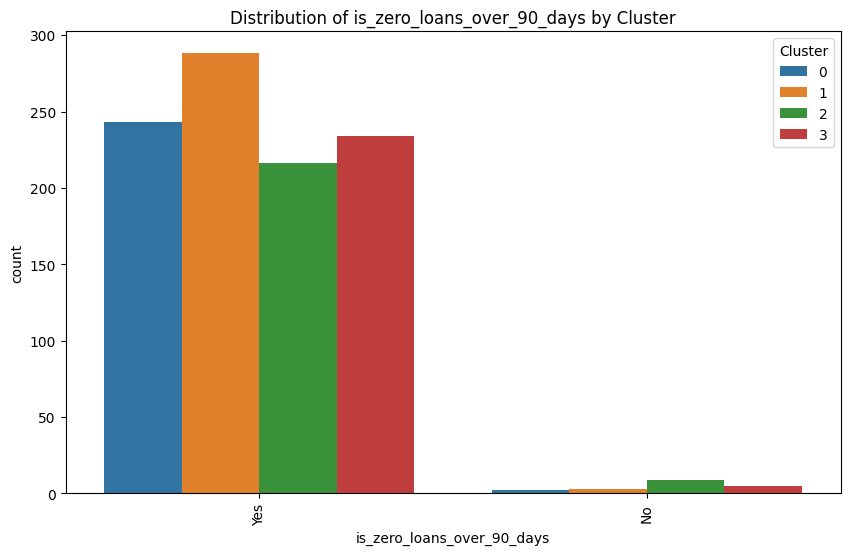

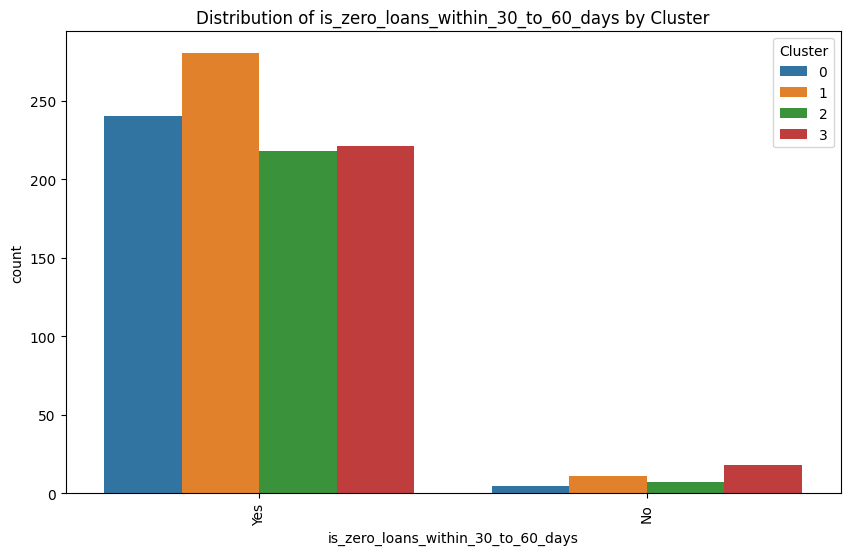

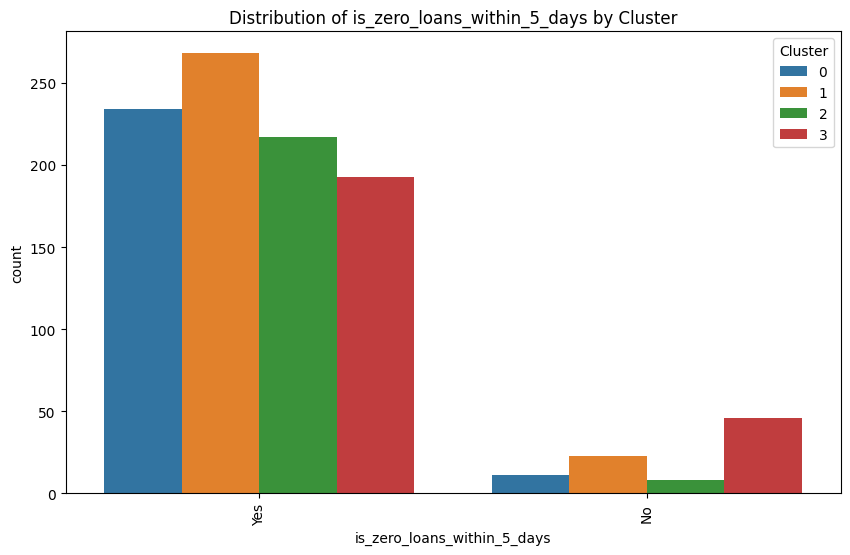

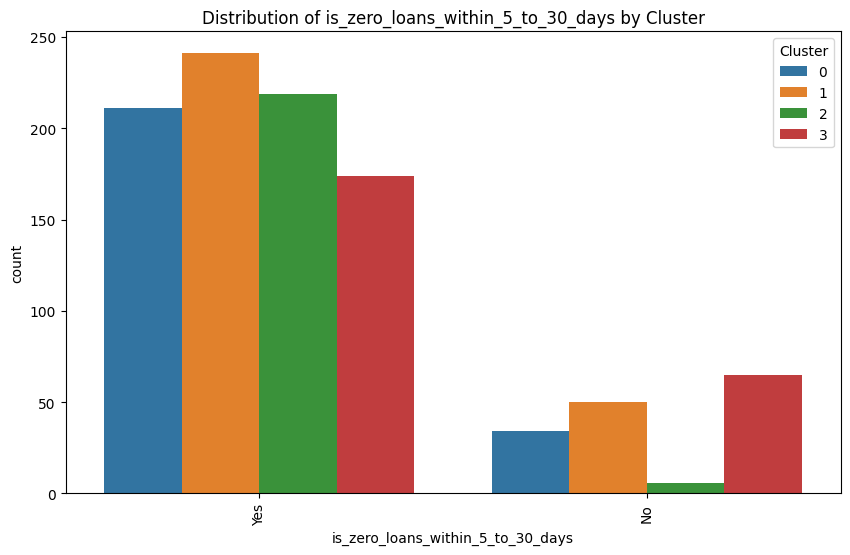

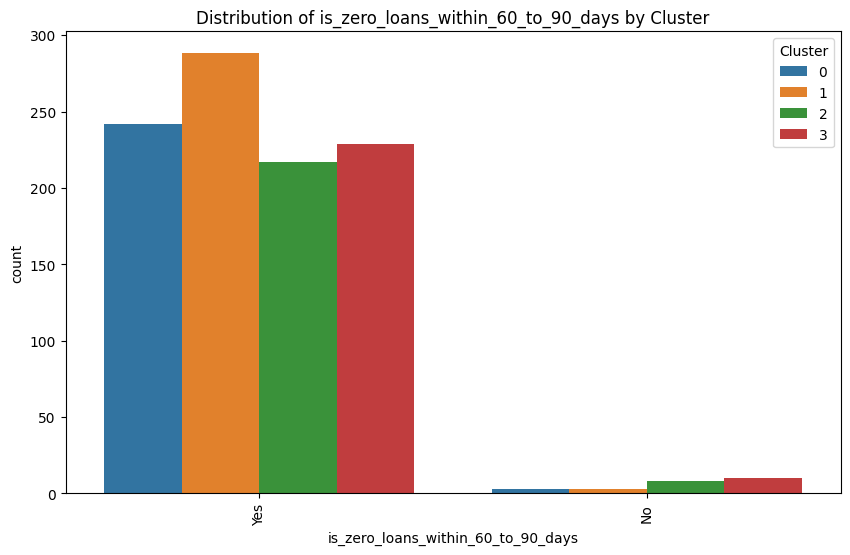

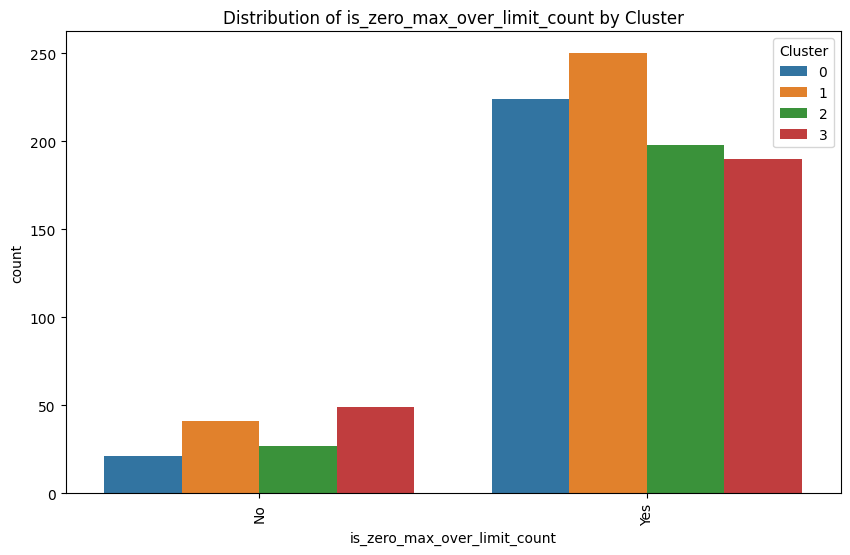

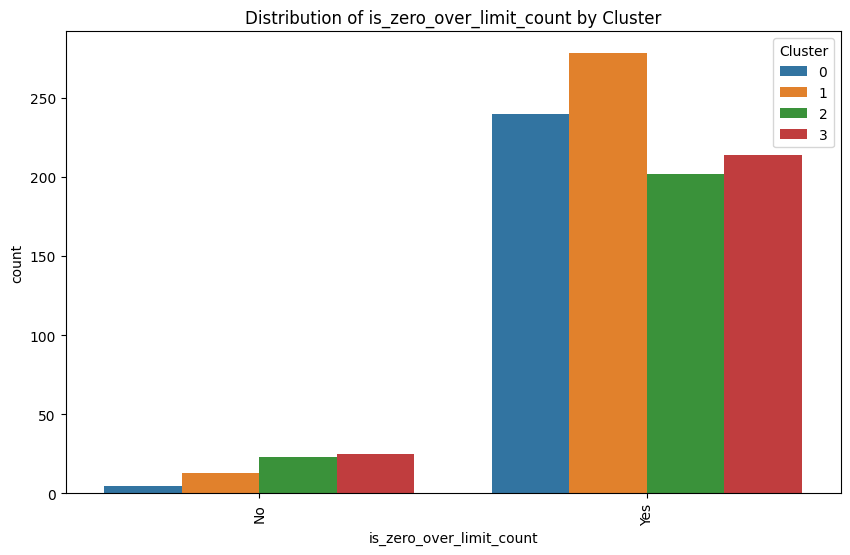

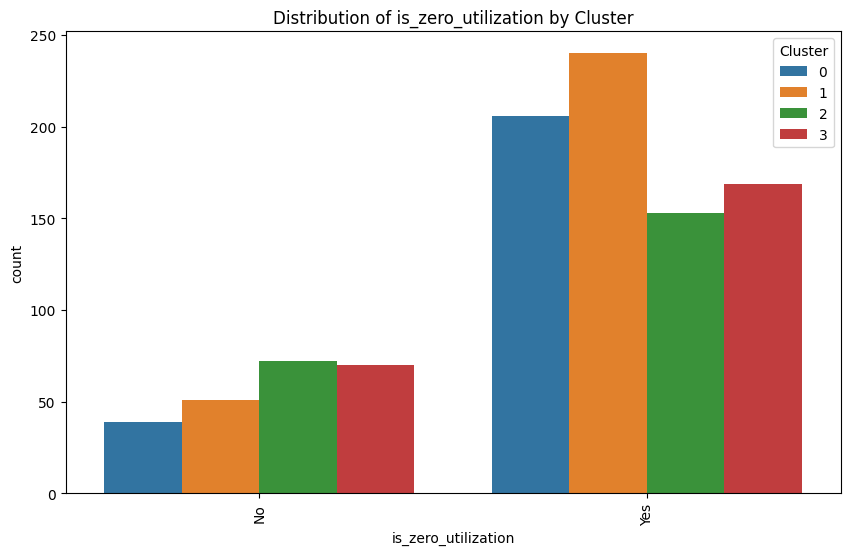

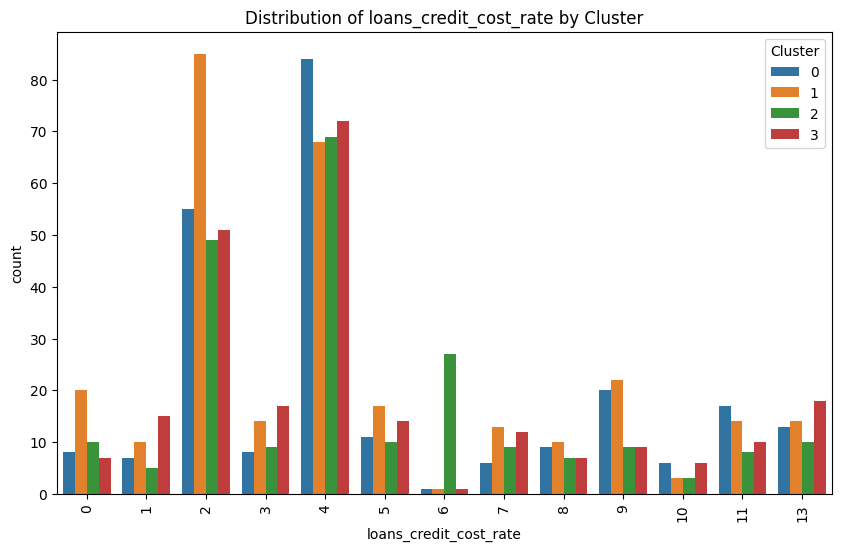

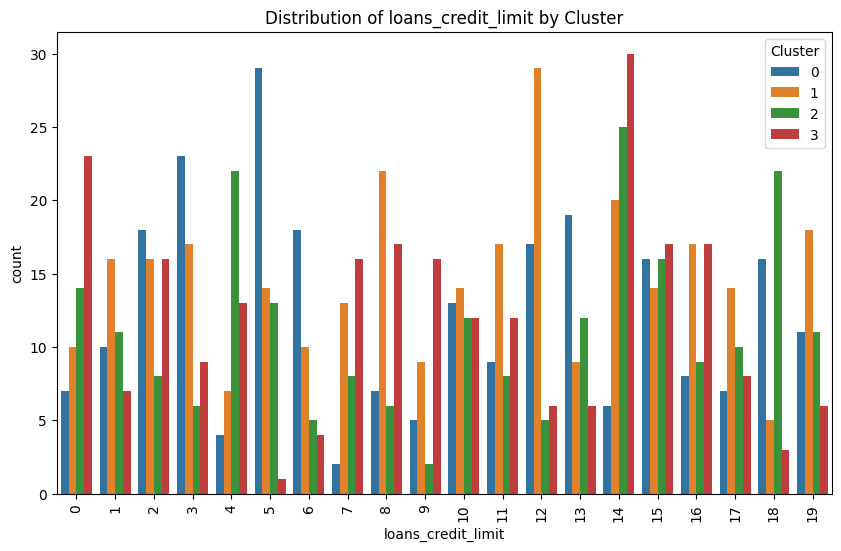

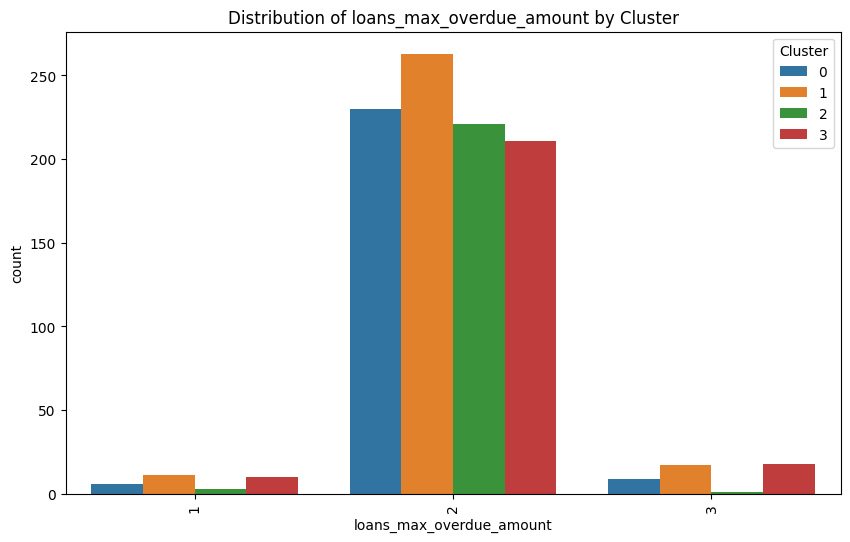

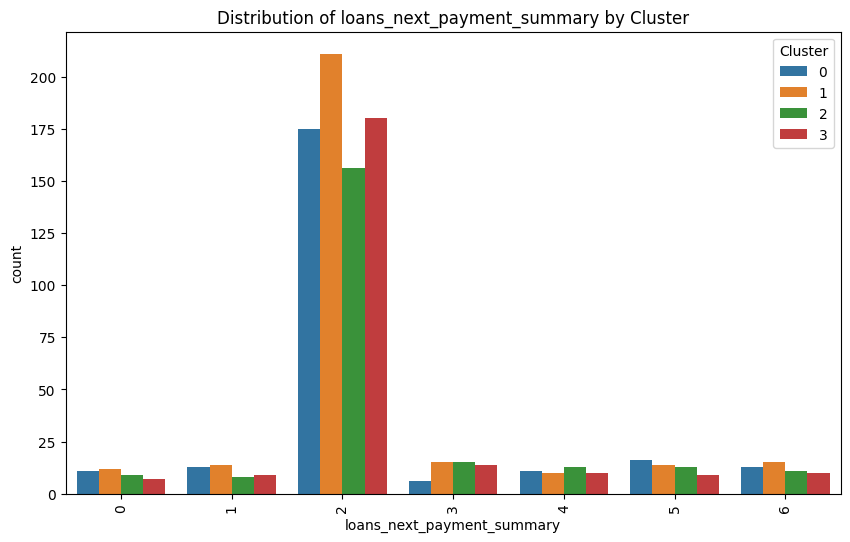

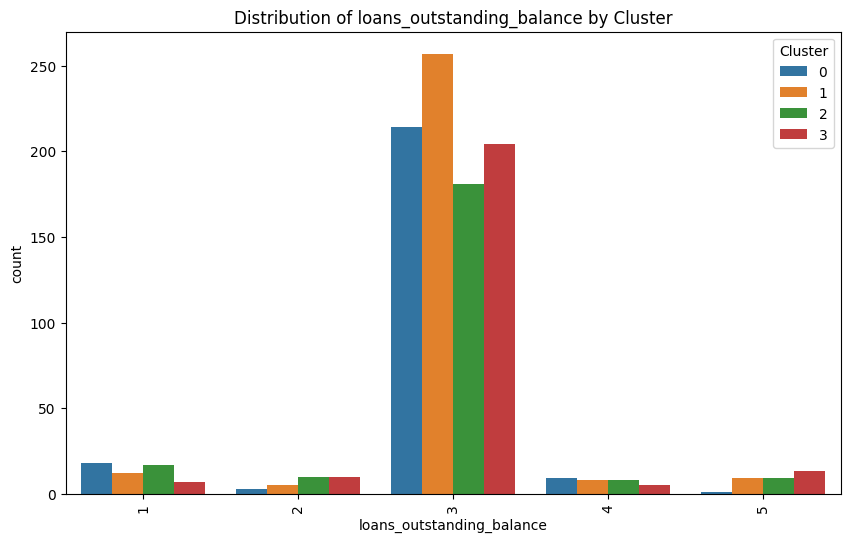

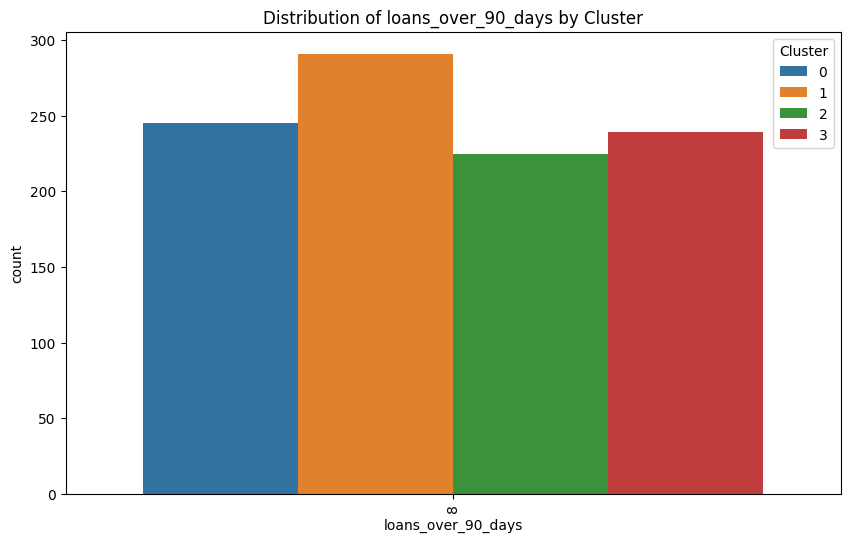

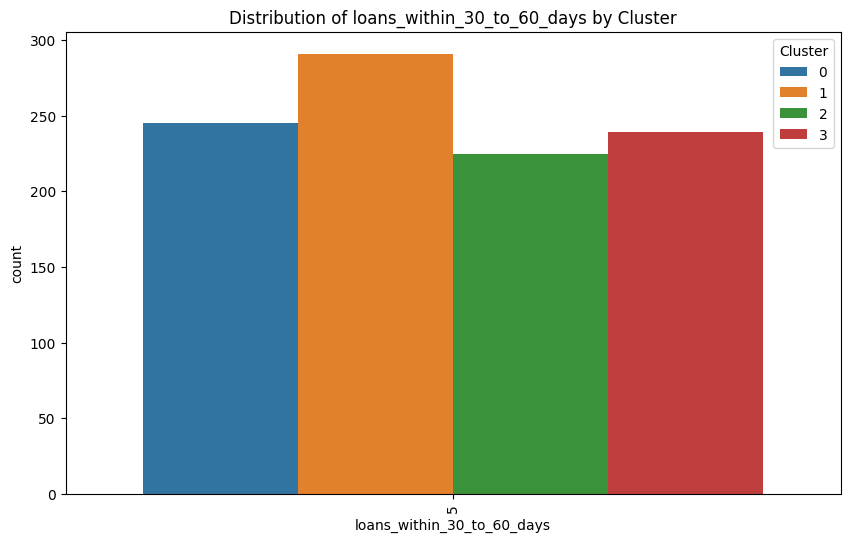

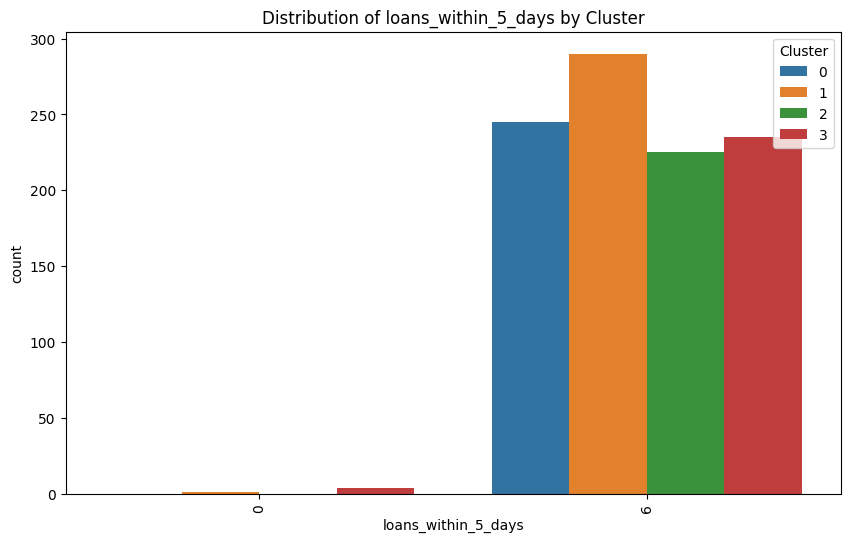

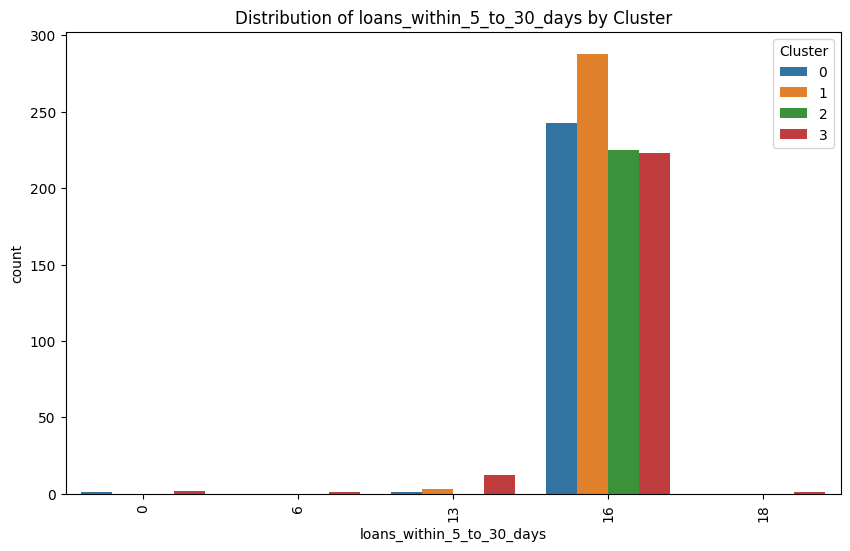

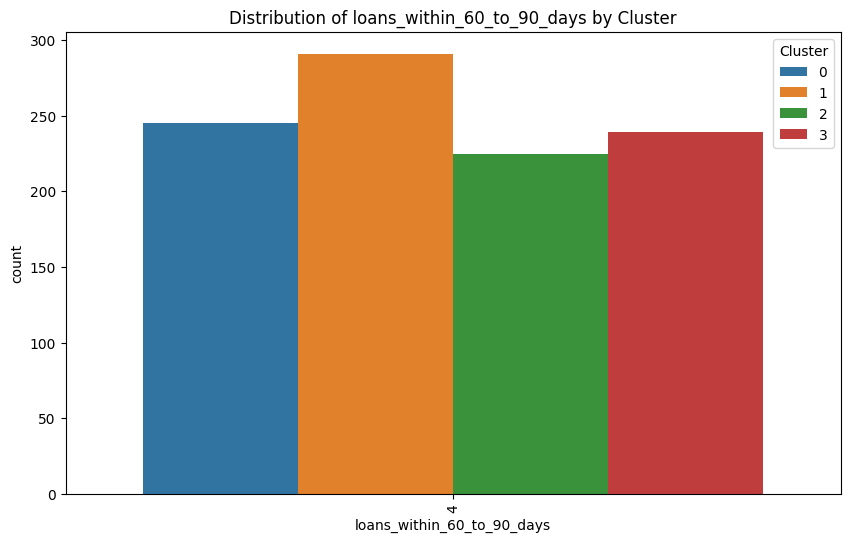

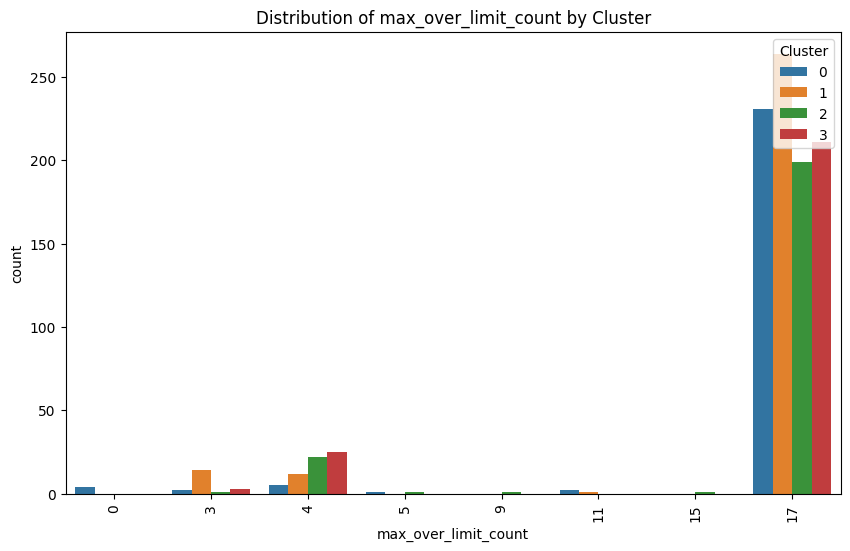

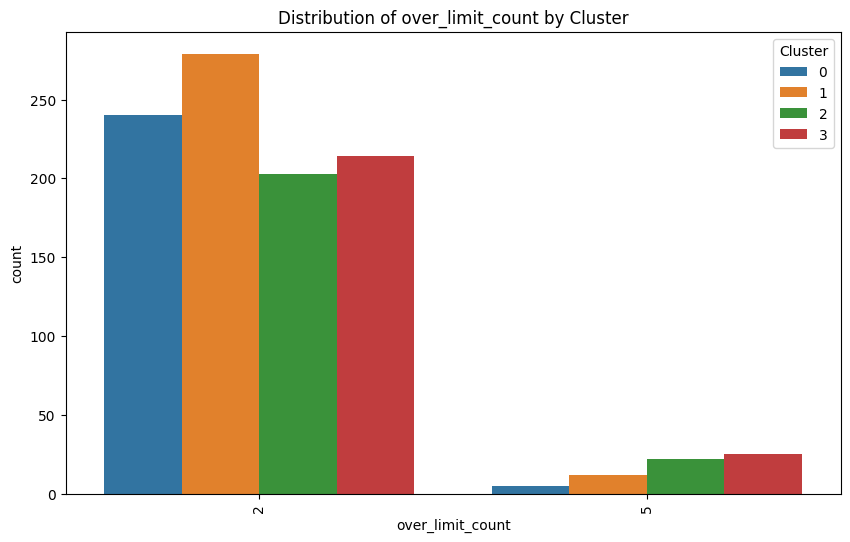

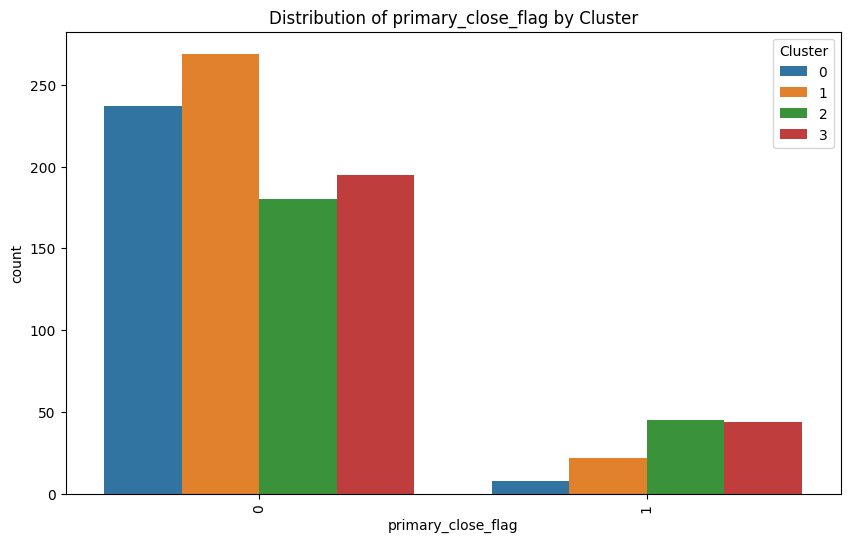

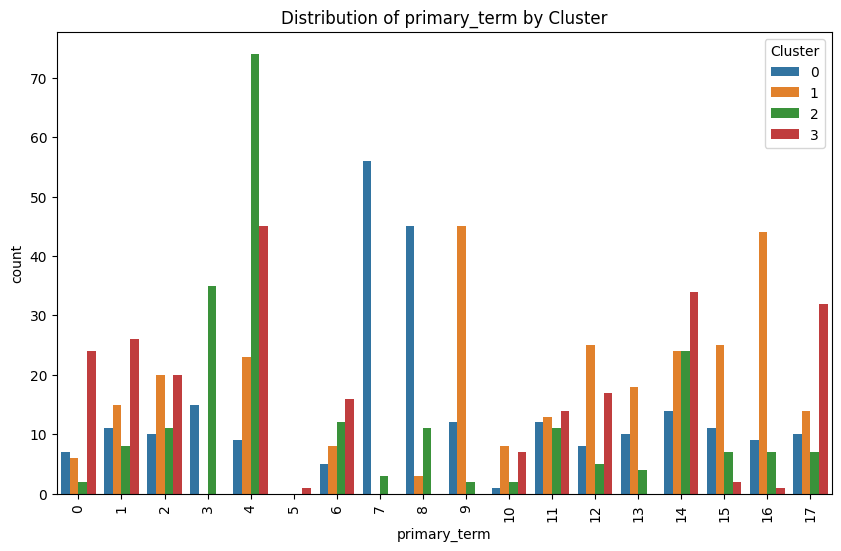

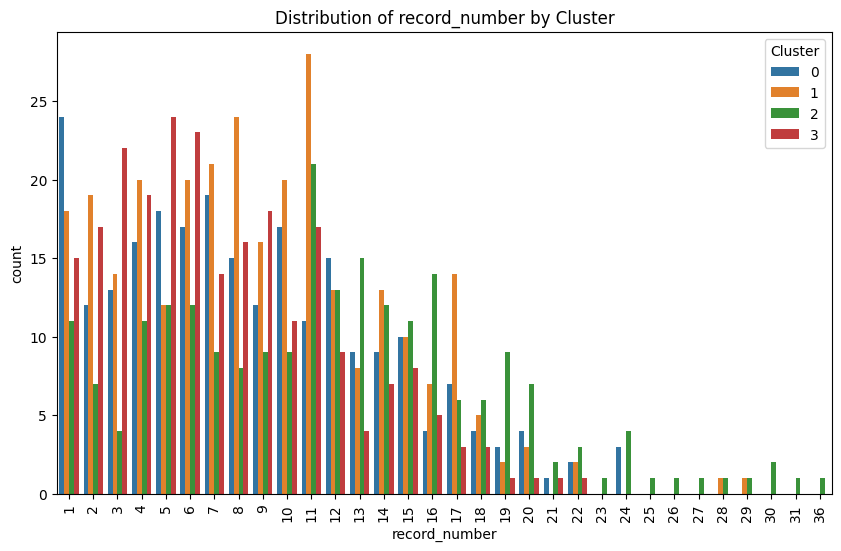

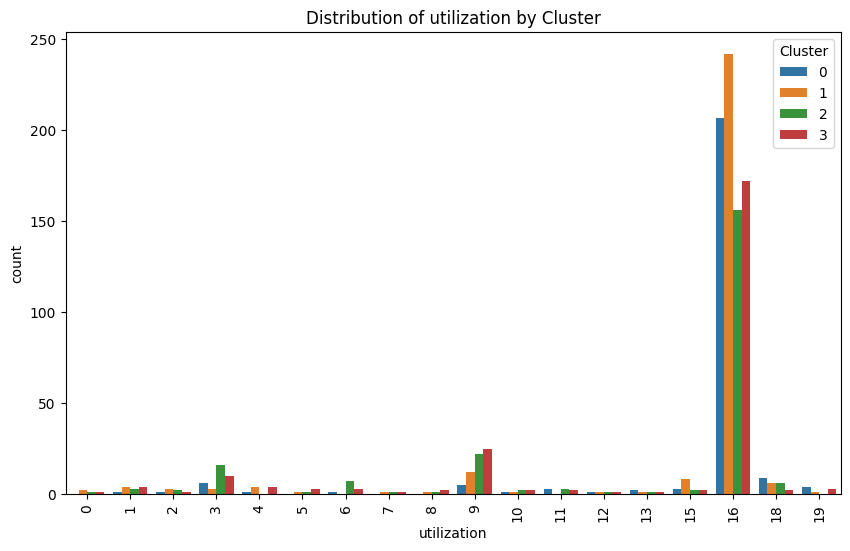

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named client_df_sample and it has a 'cluster' column
# Select all columns except 'cluster' for plotting
categorical_columns = client_df_sample.columns.difference(['cluster'])

# Create a summary plot for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=client_df_sample, x=column, hue='cluster')
    plt.title(f'Distribution of {column} by Cluster')
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.legend(title='Cluster', loc='upper right')
    plt.show()
